# Machine learning exam project

## Determening stellar surface gravity from light curves

This project investigates the link between light curves from Kepler stars and there surface gravity derived from astroseismology. The light curves are treated with different filter sizes to get intensity variations over time intervals, "flickers", for each star. The data consists of 505 Sun-like Kepler stars with "flicker" values in 50 intervals and astroseismically derived stellar surface gravities (log g values). The data is split into training and test sets, and a machine learning regressor can be trained to predict the stellar surface gravity. The aim is to be able to obtain the steller surface gravity with high accuracy without using the more time-consuming astroseimic methods. 

First we need to import tools. The np.random.seed(42) makes sure that we can reproduce earlier results.

In [1]:
import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Plotting tool based on matplotlib for fast visualization of data
import seaborn as sns

from sklearn.preprocessing import StandardScaler             # Feature scaling
from sklearn.model_selection import train_test_split         # Split data into train and test set
from sklearn.metrics import accuracy_score

# Time training and prediction time
from time import time
np.random.seed(42)

The data is loaded using pandas and column names are specified. "Star" is the star number column, "g" is the logarithmic stellar surface gravity value log(g). "interval1" is the light intensity variation over one hour from the stars, "interval2" is the variation over two hours and so on...

In [3]:
data = pd.read_csv('data.txt', header = None,sep="       ",engine='python') #Load data seperated with 7 tabs. Naming columns
data.columns = ["Star","g", "interval1","interval2","interval3","interval4","interval5","interval6","interval7","interval8","interval9","interval10","interval11","interval12","interval13","interval14","interval15","interval16","interval17","interval18","interval19","interval20","interval21","interval22","interval23","interval24","interval25","interval26","interval27","interval28","interval29","interval30","interval31","interval32","interval33","interval34","interval35","interval36","interval37","interval38","interval39","interval40","interval41","interval42","interval43","interval44","interval45","interval46","interval47","interval48","interval49","interval50"]


In [3]:
data.describe()

,Star,g,interval1,interval2,interval3,interval4,interval5,interval6,interval7,interval8,...,interval41,interval42,interval43,interval44,interval45,interval46,interval47,interval48,interval49,interval50
count,5.050000e+02,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,8.004304e+06,3.945796,0.017814,0.018261,0.053959,0.024945,0.060906,0.021270,0.065087,0.019975,...,0.089635,0.019747,0.090120,0.019633,0.090933,0.019054,0.090662,0.019491,0.092870,0.019486
std,2.653708e+06,0.252402,0.006969,0.007102,0.029792,0.014262,0.039946,0.019783,0.049621,0.025372,...,0.117515,0.040244,0.117268,0.041372,0.118793,0.040157,0.120185,0.041637,0.121071,0.039914
min,1.430163e+06,3.321000,0.008000,0.009000,0.016190,0.009506,0.018392,0.007116,0.019247,0.006089,...,0.022124,0.003598,0.022190,0.003324,0.022523,0.003301,0.021971,0.003312,0.023133,0.003698
25%,5.939450e+06,3.804000,0.014000,0.014000,0.036982,0.017829,0.041049,0.014134,0.042777,0.012201,...,0.051302,0.007553,0.051558,0.007130,0.051766,0.006965,0.051595,0.007105,0.053007,0.007321
50%,8.377423e+06,3.980000,0.017000,0.017000,0.047113,0.022421,0.051951,0.017692,0.053952,0.015330,...,0.062884,0.010113,0.062773,0.009748,0.063704,0.009636,0.063532,0.009851,0.065870,0.010452
75%,1.008814e+07,4.119000,0.020000,0.021000,0.061601,0.027906,0.069617,0.023385,0.073517,0.020783,...,0.095480,0.016215,0.096732,0.015696,0.096343,0.015593,0.096075,0.015990,0.097418,0.015824
max,1.273558e+07,4.478000,0.098000,0.099000,0.360827,0.243430,0.612998,0.380403,0.832263,0.491202,...,1.850017,0.642243,1.839679,0.655758,1.859239,0.643864,1.914727,0.679027,1.909542,0.668510


Cross validation plots for the intervals and log(g) values are made for comparison

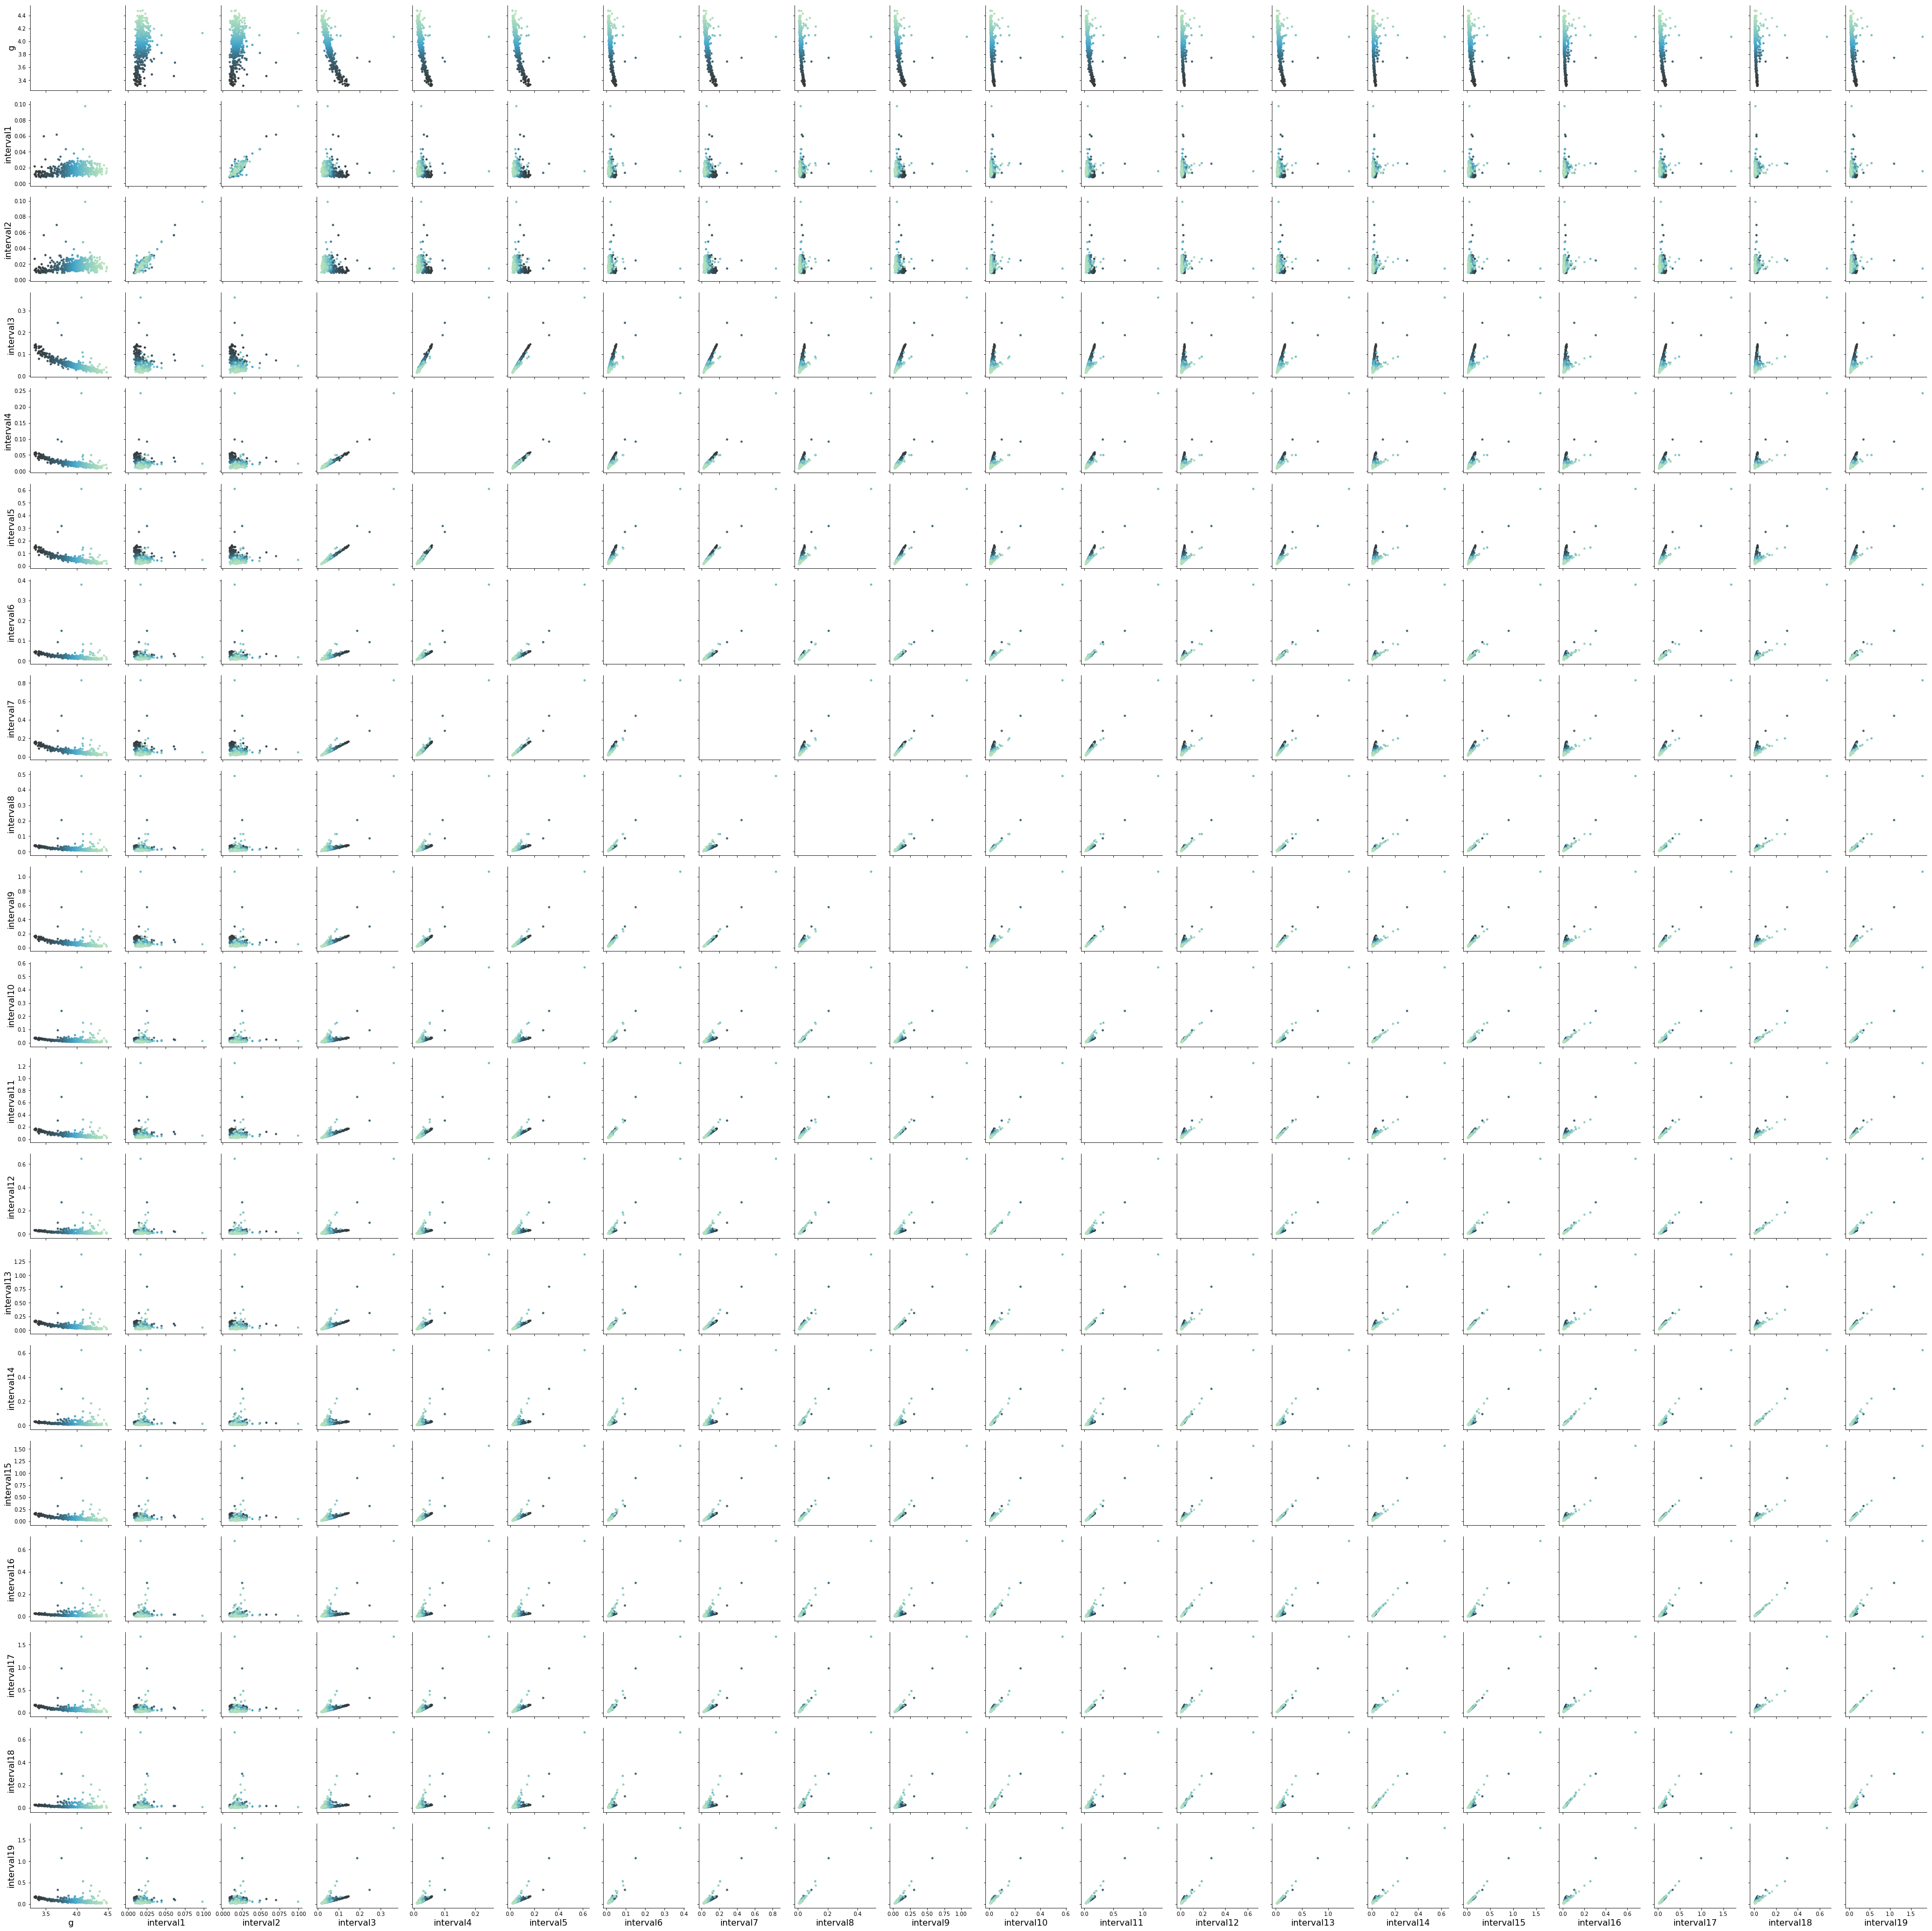

In [43]:
with sns.plotting_context(rc={"axes.labelsize":16}):  # Temporarily change the font size for seaborn plots
    # Decide number of stars and number of parameters to show against each other
    data_plot_features = data.iloc[:, 1:21]
    
    # Create pairgrid with hue set to show the log(g) values. Darker colors are lower log(g) values
    g = sns.PairGrid(data_plot_features, hue="g", palette="GnBu_d")
    g = g.map_offdiag(plt.scatter, s=10)
    

    # Show histograms of the data on the diagonal and plot the figure
  #  g = g.map_diag(plt.hist, edgecolor="w")
    plt.show()

Define y values as log(g) and x values as the intensity intervals in ppt. The data is then split into training and testing sets using the sklearn tool train_test_split. The test_size specifies the split ratio. 0.3 means 70 % training and 30 % testing.  

In [4]:
X = data.values[:,2:]
y = data.values[:,1]

# Create a train/test split using 30% test size.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pd.to_numeric(y_train, errors='coerce');

The following piece of code evaluates a regressor. The regressor is developed on the training data, and the trained regressor is then used on the test data and evaluated on its accuracy. Scaling can be enabled if needed. This will scale the mean value to 0 and the standard deviation to 1.

In [5]:
def evaluate_regressor(reg, X_train, X_test, y_train, y_test, feature_scale=False):
    
    # Perform feature scaling
    scaler = StandardScaler()  # Scale to mean = 0 and std_dev = 1
    if feature_scale:

        X_train = scaler.fit_transform(X_train)  # Fit to training data and then scale training data
        X_test = scaler.transform(X_test)  # Scale test data based on the scaler fitted to the training data
        
    # Store the time so we can calculate training time later
    t0 = time()

    reg.fit(X_train, y_train)
    
    # Calculate and print training time
    print("Training time:", round(time()-t0, 4), "s")

    # Store the time so we can calculate prediction time later
    t1 = time()
    
    predictions = reg.predict(X_test)
    
    # Calculate and print prediction time
    print("Prediction time:", round(time()-t1, 4), "s")

    # Evaluate the Regressor
    train_accuracy = reg.score(X_train, y_train)
    test_accuracy = reg.score(X_test, y_test)
    resi = predictions-y_test
    
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import median_absolute_error
    MSE = mean_squared_error(y_test,predictions) #Mean square of the residuals
    MAE = median_absolute_error(y_test,predictions) #Median absolute error

    print("\nReport:\n")
    print("Train accuracy: {}".format(round(train_accuracy, 4))) #Train and test accuracy for the regressor
    print("Test accuracy: {}".format(round(test_accuracy, 4)))

    plt.plot(y_test,resi,'r.')
    plt.xlabel('Astroseismic log(g)')
    plt.ylabel('Residual (dex)')
    plt.show()
    print("RMSE: {}" .format(round(np.sqrt(MSE), 4))) #Root mean square error
    print("Median absolute error: {}".format(round(MAE, 4)))

    return reg, scaler


Next we import Regressor types from scikit learn. Imported here are the Support Vector Regressor (SVR), the Multi Layer Perceptron Regressor (MLPR) and the Linear Regressor.

In [6]:
from sklearn.svm import SVR   
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

First the Support Vector Regressor is tested. Support vector machines are a set of supervised learning methods used for classification, regression and outliers detection. It uses a subset of training points in the decision function (called support vectors), giving it an efficient memory and supports both dense and sparse sample vectors as input. A linear Kernel is used as this gave the best results.


Support Vector Regressor:

Training time: 0.0441 s
Prediction time: 0.0011 s

Report:

Train accuracy: 0.8236
Test accuracy: 0.8186


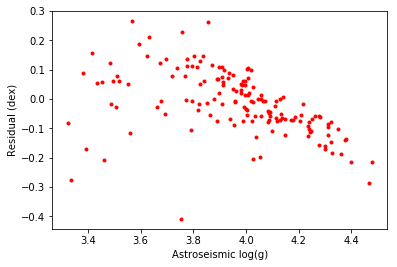

RMSE: 0.1086
Median absolute error: 0.072


In [7]:
print("\nSupport Vector Regressor:\n")
reg = SVR(kernel='linear')
reg_trained = evaluate_regressor(reg, X_train, X_test, y_train, y_test, feature_scale=True)

Multi-layer Perceptron (MLP) regression is a supervised machine learning algorithm, that can learn a non-linear function $f(\cdot): R^m \rightarrow R^o$, with $m$ as input dimension and $o$ output dimension, by training on a dataset with features $X = {x_1, x_2, ..., x_m}$ and target $y$ using backpropagation. It is a neural network that consists of an input layer with a set of neurons representing the features, one or more hidden layers transforming the input from the previous layer with a weight function and a non-linear activation function, and an output layer.

Scikit-learn is used to implement the MLP regressor. The function is called MLPRegressor and can be found in the **sklearn.neural_network** library. The functions takes several inputs, all set to default except *solver*, *activation*, *alpha* and *hidden_layer_sizes*. *solver* defines the weight optimization function that performs parameter updates in the hidden layers. *activation* defines the activation function used for tranformation in the hidden layers. *alpha* defines the regularization term which penalizes weights with large magnitudes to avoid over-fitting. *hidden_layer_sizes* defines the number of hidden layers and the number of units in each hidden layer.

The solver L-BFGS is used because it works best for smaller datasets according to the sci-kit learn documentation.
The logistic activation function is used, as it has proven to work best on this dataset. The regularization term *alpha* is set to 0.05, as a result of optimization with the GridSearchCV function from **sklearn.model_selection**. The hidden layer size is set to 100 units as a default, and the number of hidden layers is set to 3 as this minimized the error(the *hidden_layer_sizes* parameter only influences the accuracy to a very small degree unless a very high number of units or layers are used). 


Multi Layer Perceptron Regressor:

Training time: 0.3359 s
Prediction time: 0.0009 s

Report:

Train accuracy: 0.8896
Test accuracy: 0.8527


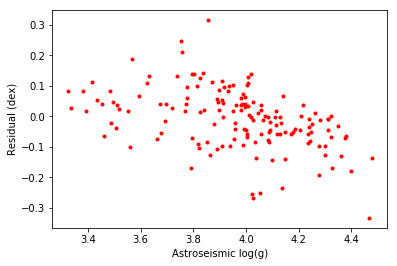

RMSE: 0.0979
Median absolute error: 0.0583


In [13]:
print("\nMulti Layer Perceptron Regressor:\n")
reg2 = MLPRegressor(solver='lbfgs', activation='logistic', alpha=0.05, hidden_layer_sizes=(100, 3))
reg2_trained = evaluate_regressor(reg2, X_train, X_test, y_train, y_test, feature_scale=True)

An ordinary linear regression type is also tested. The linear regressor minimizes the residual sum of squares between the observed and predicted value.


Linear Regressor: 

Training time: 0.0563 s
Prediction time: 0.0006 s

Report:

Train accuracy: 0.8639
Test accuracy: 0.6937


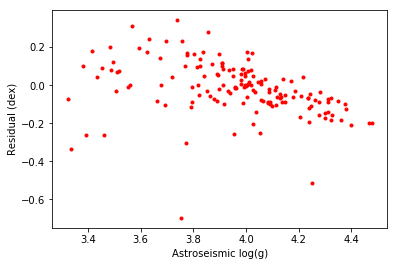

RMSE: 0.1411
Median absolute error: 0.0831


In [9]:
print("\nLinear Regressor: \n")
reg3 = LinearRegression()
reg3_trained = evaluate_regressor(reg3, X_train, X_test, y_train, y_test, feature_scale=True)

In the article "Asteroseismic Fundamental Properties of Solar-type Stars Observed by the NASA Kepler Mission" by Chaplin, W. J. et al. (http://adsabs.harvard.edu/abs/2014ApJS..210....1C), they find a polynomial relationship between the $F_8$-flicker (light-curve variations under 8 hrs) and $log(g)$. They reject outliers above 0.1 dex and below 0.2 dex of their polynomial fit iteratively and end up with a total RMSE of 0.1 dex and a median absolute deviation 0f 0.09 dex. They have a considerably larger dataset of 27,628 Kepler stars, whereas we only have 505 Sun-like Kepler stars. 

Despite our much smaller sample size, the predicted log g values from the MLPRegressor has an RMSE of about 0.098 dex and a median absolute deviation of 0.056 dex. The accuracy is thus slightly better using a MLP neural network algorithm, but training on a much larger data set could improve the accuracy significantly.  